In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

# **About Dataset**
### **Description**:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

### **Variables**:
- **Hours Studied**: The total number of hours spent studying by each student.
- **Previous Scores**: The scores obtained by students in previous tests.
- **Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).
- **Sleep Hours**: The average number of hours of sleep the student had per day.
- **Sample Question Papers Practiced**: The number of sample question papers the student practiced.
### **Target Variable**:

- **Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.
The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

**P.S**: Please note that this dataset is synthetic and created for illustrative purposes. The relationships between the variables and the performance index may not reflect real-world scenarios

## **EDA and Data Cleaning**

In [99]:
data = pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [100]:
data.shape

(10000, 6)

In [101]:
# Convert 'Extracurricular Activities' column to binary
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [102]:
data = data.dropna()

In [103]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [104]:
# Check for duplicated rows
duplicated_rows = data[data.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 127


In [105]:
# Print duplicated rows
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
915               9               52                           0            5   
1477              7               61                           1            6   
1601              5               99                           0            7   
1786              2               62                           1            9   
2026              5               87                           1            6   
...             ...              ...                         ...          ...   
9644              4               91                           1            4   
9940              8               95                           0            5   
9954              6               97                           0            8   
9966              1               41                           0            7   
9985              8               99                           0            5   

      Samp

## **Descriptive Statistics**

In [106]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


## **Data Visualization**

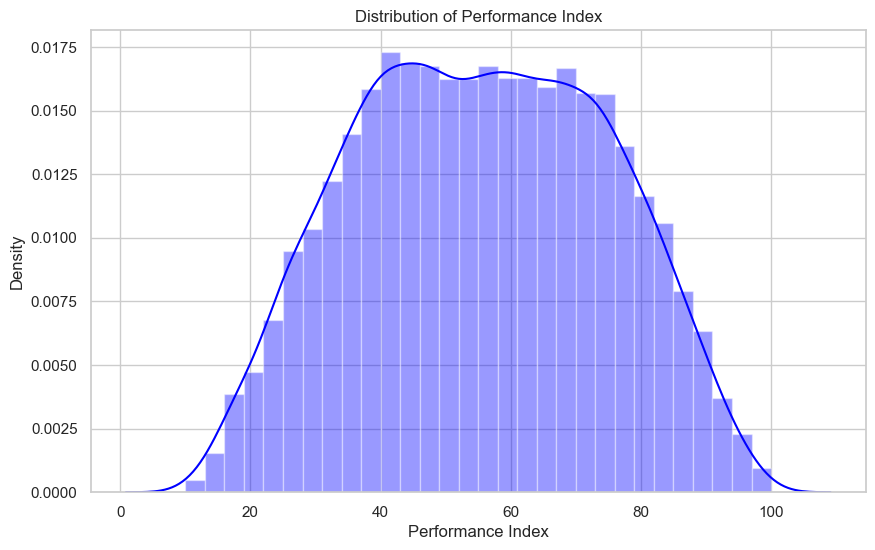

In [107]:
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Set the figure size

sns.distplot(data["Performance Index"], bins=30, kde=True, color="blue")  # Plot the distribution

plt.title("Distribution of Performance Index") 
plt.xlabel("Performance Index")  
plt.ylabel("Density")  

plt.show() 


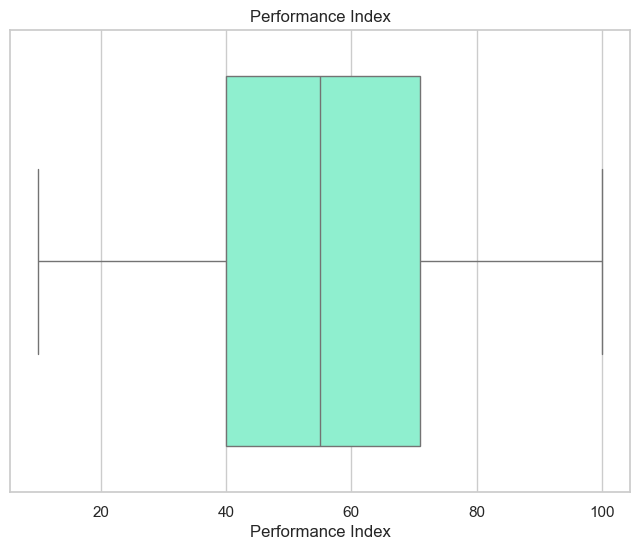

In [108]:
plt.figure(figsize=(8, 6))
boxplot_color = "aquamarine"
sns.boxplot(x=data['Performance Index'], color=boxplot_color)
plt.title('Performance Index')
plt.show()

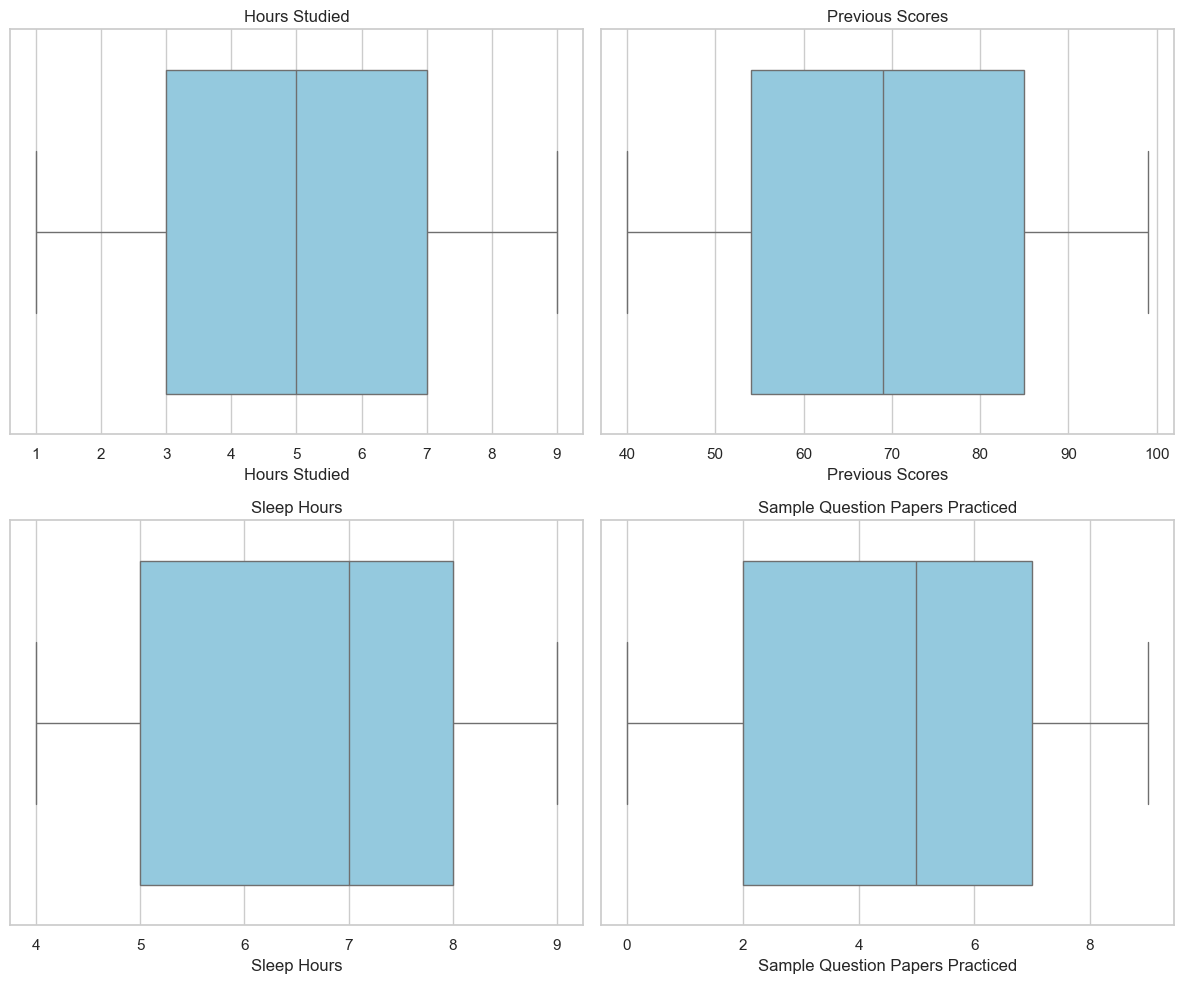

In [109]:
# Create a figure and a 2x2 grid of subplots 
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
#Set Color for Boxplot
boxplot_color = "skyblue"

# Boxplot for 'Hours Studied'
sns.boxplot(x=data['Hours Studied'], ax=axs[0, 0], color = boxplot_color)
axs[0, 0].set_title('Hours Studied')

# Boxplot for 'Previous Scores'
sns.boxplot(x=data['Previous Scores'], ax=axs[0, 1], color = boxplot_color)
axs[0, 1].set_title('Previous Scores')

# Boxplot for 'Sleep Hours'
sns.boxplot(x=data['Sleep Hours'], ax=axs[1, 0], color = boxplot_color)
axs[1, 0].set_title('Sleep Hours')

# Boxplot for 'Sample Question Papers Practiced'
sns.boxplot(x=data['Sample Question Papers Practiced'], ax=axs[1, 1], color = boxplot_color)
axs[1, 1].set_title('Sample Question Papers Practiced')


plt.tight_layout()
plt.show()


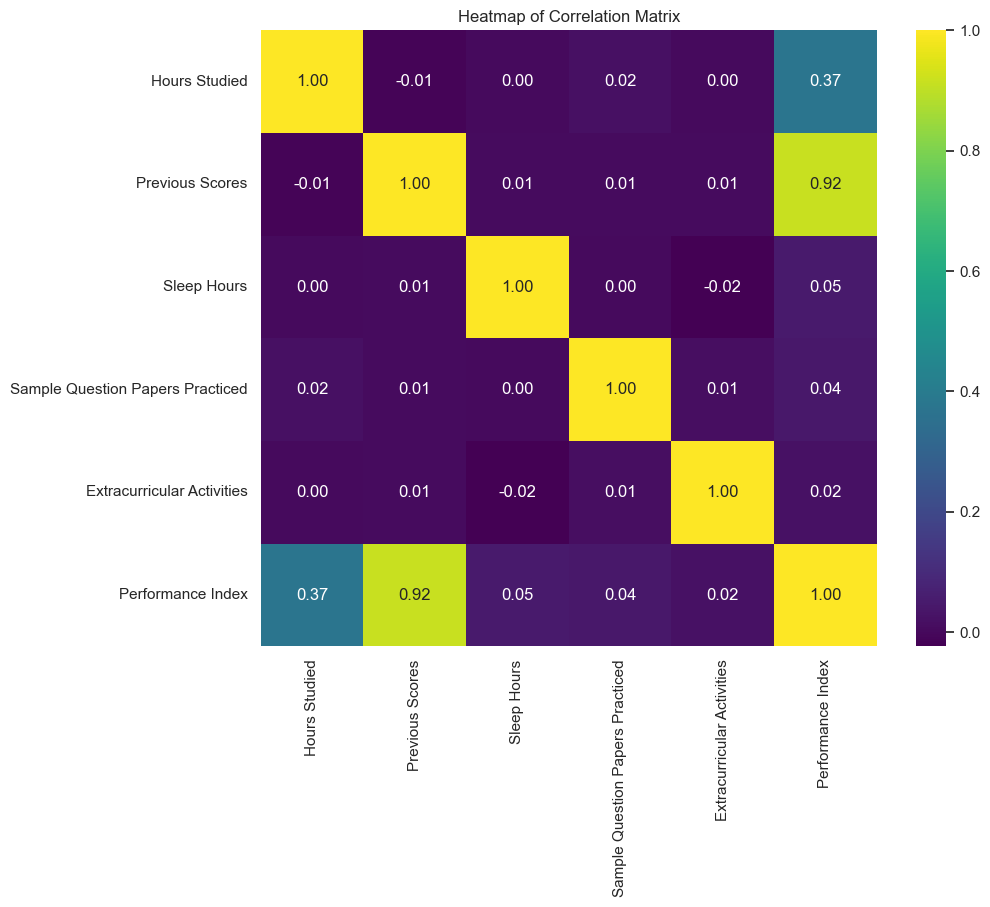

In [126]:
selected_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced','Extracurricular Activities','Performance Index']
data_selected = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### **Build Linear Regression from scratch**

In [111]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = len(y)
    Cost_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        # Calculate hypothesis
        h = hypothesis(X,theta)
        
        # Calculate error
        error = h - y
        
        # Calculate gradient
        gradient = np.dot(X.T, error) / m
        
        # Update parameters
        theta -= learning_rate * gradient
        
        # Calculate cost function
        Cost_history[iter] = np.sum(error ** 2) / (2 * m)
        
    return theta, Cost_history

def hypothesis(X, theta):
    return np.dot(X, theta)

def scale_features(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)



In [112]:
def R2_score(y_true, y_pred):
    # Calculate mean of true values
    mean_true = np.mean(y_true)
    
    # Calculate total sum of squares (TSS)
    tss = np.sum((y_true - mean_true) ** 2)
    
    # Calculate residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)
    
    # Calculate R-squared score
    r2 = 1 - (rss / tss)
    
    return r2

def Mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def Mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae


### **Data Splitting**

In [113]:
# Split features and target
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Data Normalization**

In [114]:
# scale the features
X_train_scaled = scale_features(X_train)
X_test_scaled = scale_features(X_test)

# add the intercept term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# initialize the weights
weights = np.random.rand(X_train_scaled.shape[1])

### **Train the model**

In [115]:
# define the learning rate and number of epochs
learning_rate = 0.01
epochs = 10000

# train the model
weights, Cost_history = gradient_descent(X_train_scaled, y_train, weights, learning_rate, epochs)

In [116]:
# Print results for each iteration
for iter in range(epochs):
    print(f"Epochs {iter + 1}: Cost = {Cost_history[iter]}")

Epochs 1: Cost = 1687.6925637869476
Epochs 2: Cost = 1654.169595390577
Epochs 3: Cost = 1621.3133458886418
Epochs 4: Cost = 1589.1105548657788
Epochs 5: Cost = 1557.5482256522732
Epochs 6: Cost = 1526.6136200780763
Epochs 7: Cost = 1496.2942533311666
Epochs 8: Cost = 1466.5778889181852
Epochs 9: Cost = 1437.4525337253071
Epochs 10: Cost = 1408.9064331773566
Epochs 11: Cost = 1380.9280664932132
Epochs 12: Cost = 1353.5061420355892
Epochs 13: Cost = 1326.6295927533074
Epochs 14: Cost = 1300.2875717142335
Epochs 15: Cost = 1274.4694477270623
Epochs 16: Cost = 1249.1648010501904
Epochs 17: Cost = 1224.3634191859444
Epochs 18: Cost = 1200.0552927584624
Epochs 19: Cost = 1176.2306114735711
Epochs 20: Cost = 1152.87976015902
Epochs 21: Cost = 1129.993314883481
Epochs 22: Cost = 1107.5620391527457
Epochs 23: Cost = 1085.576880181578
Epochs 24: Cost = 1064.0289652397266
Epochs 25: Cost = 1042.9095980706165
Epochs 26: Cost = 1022.2102553812749
Epochs 27: Cost = 1001.9225834020751
Epochs 28: Cost

In [117]:
# Make predictions
y_pred = hypothesis(X_test_scaled, weights)

### **Evaluate the result**

In [118]:
# Evaluate the model
r2_my_model = R2_score(y_test, y_pred)
print('R2 score:', R2_score(y_test, y_pred))
print('Mean Absolute Error:', Mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', Mean_squared_error(y_test, y_pred))

R2 score: 0.9884832861331784
Mean Absolute Error: 1.651284628505251
Mean Squared Error: 4.267922744274895


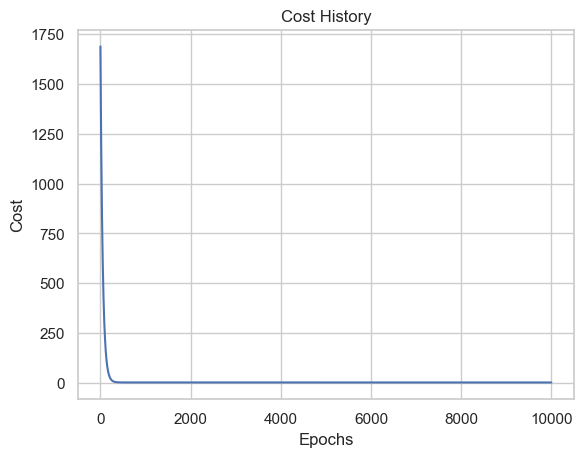

In [119]:
# Plot the cost history
plt.plot(range(len(Cost_history)), Cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)
plt.show()

### **Using the existed Linear Regression Model**

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Feature Scaling
# Standardize numerical features
scaler = StandardScaler()

# Create a pipeline
pipeline = Pipeline(steps=[
    ('scaler', scaler)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)


In [121]:
# Train the model
model_default = LinearRegression()
model_default.fit(X_train_processed, y_train)

# Predict the model
test_pred = model_default.predict(X_test_processed)


In [122]:
# Evaluate the model
r2_existed_model = r2_score(y_test, test_pred)
print('R2 score:',r2_existed_model)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, test_pred))

R2 score: 0.9889832909573145
Mean Absolute Error: 1.6111213463123029
Mean Squared Error: 4.082628398521845


### **Comparing the result**

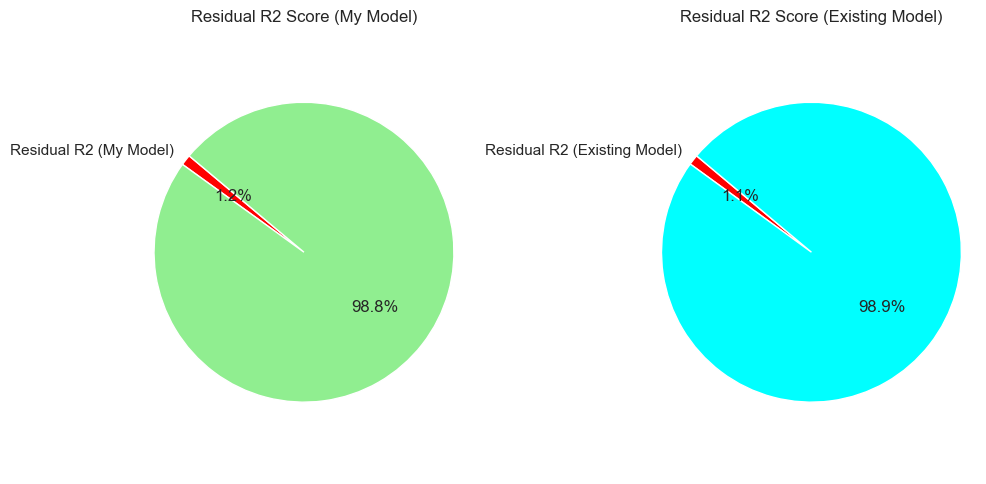

In [123]:
# Calculate residuals
residual_my_model = 1 - r2_my_model
residual_existing_model = 1 - r2_existed_model

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart for your model
axs[0].pie([residual_my_model, 1-residual_my_model], labels=['Residual R2 (My Model)', ''], colors=['red', 'lightgreen'], autopct='%1.1f%%', startangle=140)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axs[0].set_title('Residual R2 Score (My Model)')

# Plot pie chart for the existing model
axs[1].pie([residual_existing_model, 1-residual_existing_model], labels=['Residual R2 (Existing Model)', ''], colors=['red', 'cyan'], autopct='%1.1f%%', startangle=140)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axs[1].set_title('Residual R2 Score (Existing Model)')

plt.tight_layout()
plt.show()

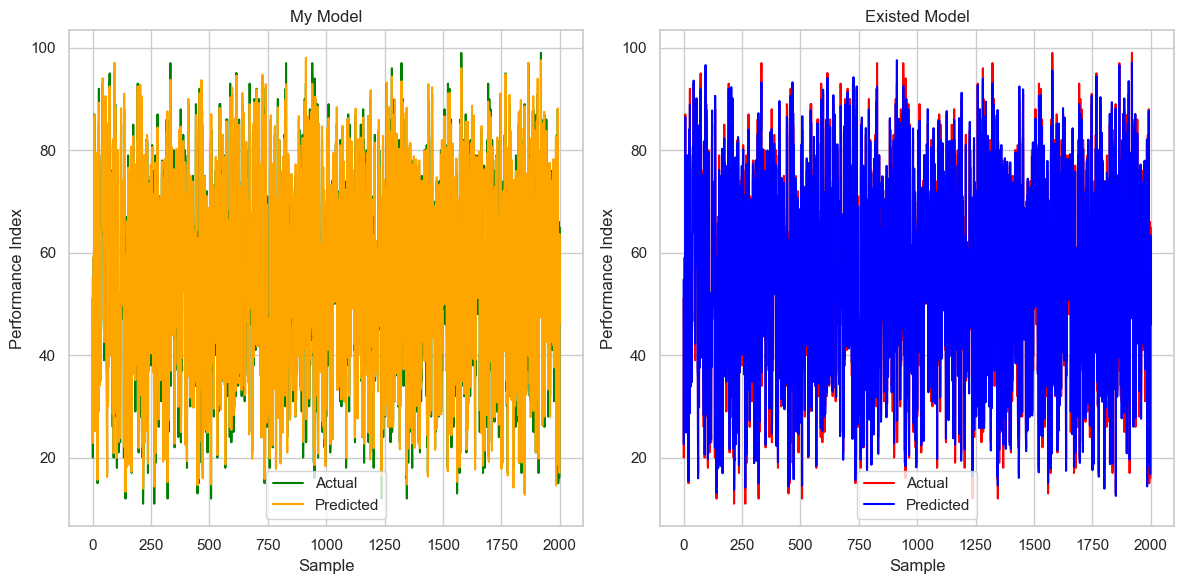

In [124]:
# Define the range for plotting
range_values = np.arange(len(y_pred))
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for your model
axs[0].plot(range_values, y_test, color='green', label='Actual')
axs[0].plot(range_values, y_pred, color='orange', label='Predicted')
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Performance Index')
axs[0].set_title('My Model')
axs[0].legend()

# Plot for the existing model 
axs[1].plot(range_values, y_test, color='red', label='Actual')
axs[1].plot(range_values, test_pred, color='blue', label='Predicted')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Performance Index')
axs[1].set_title('Existed Model')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [125]:
# Create a DataFrame with Actual and Predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'My Model': y_pred, 'Existed Model': test_pred}, index=y_test.index)
comparison_df.head(10)

,Actual,My Model,Existed Model
6252,51.0,55.074827,54.711854
4684,20.0,22.850402,22.615513
1731,46.0,48.314699,47.903145
4742,28.0,31.669067,31.289767
4521,41.0,43.401572,43.004570
6340,59.0,59.532439,59.071252
576,48.0,46.280262,45.903475
5202,87.0,86.857867,86.459118
6363,37.0,38.102837,37.700140
439,73.0,72.485203,72.055925
